# Assignment 5, Question 5: Missing Data Analysis

**Points: 15**

Apply and compare different missing data strategies on the clinical trial dataset.

## Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import utilities from Q3
from q3_data_utils import load_data, detect_missing, fill_missing

# Load the data
df = load_data('data/clinical_trial_raw.csv')
print(f"Loaded {len(df)} patients")

# Prewritten visualization function for missing data
def visualize_missing_data(missing_counts):
    """
    Create a bar chart of missing values by column.
    
    Args:
        missing_counts: pandas Series with missing value counts per column
    """
    plt.figure(figsize=(10, 6))
    missing_counts.plot(kind='bar')
    plt.title('Missing Values by Column')
    plt.xticks(rotation=45)
    plt.ylabel('Number of Missing Values')
    plt.tight_layout()
    plt.show()

Loaded 10000 patients


## Part 1: Detect Missing Data (3 points)

1. Use the `detect_missing()` utility to find missing values
2. Visualize missing data with a bar plot
3. Calculate the percentage of missing values per column

patient_id               0
age                      0
sex                      0
bmi                    438
enrollment_date          0
systolic_bp            414
diastolic_bp           414
cholesterol_total      554
cholesterol_hdl        554
cholesterol_ldl        554
glucose_fasting        369
site                     0
intervention_group       0
follow_up_months         0
adverse_events           0
outcome_cvd              0
adherence_pct         1467
dropout                  0
dtype: int64

patient_id             0.00
age                    0.00
sex                    0.00
bmi                    4.38
enrollment_date        0.00
systolic_bp            4.14
diastolic_bp           4.14
cholesterol_total      5.54
cholesterol_hdl        5.54
cholesterol_ldl        5.54
glucose_fasting        3.69
site                   0.00
intervention_group     0.00
follow_up_months       0.00
adverse_events         0.00
outcome_cvd            0.00
adherence_pct         14.67
dropout                0.00
dtype: float64

Columns with Missing Data: 
 bmi                   438
systolic_bp           414
diastolic_bp          414
cholesterol_total     554
cholesterol_hdl       554
cholesterol_ldl       554
glucose_fasting       369
adherence_pct        1467
dtype: int64


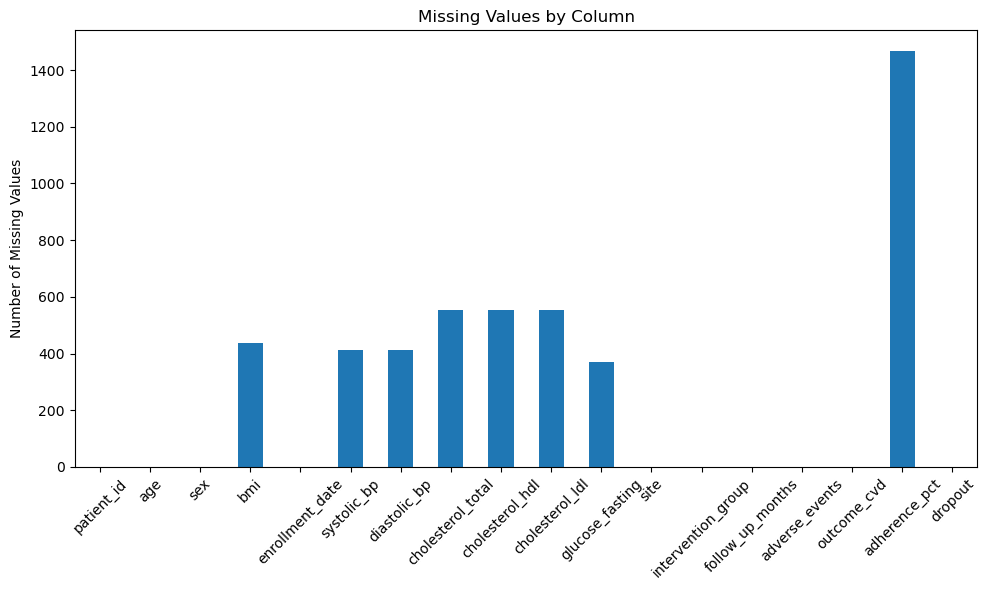

In [2]:
# TODO: Detect and analyze missing data
# 1. Use detect_missing(df) to get missing value counts
missing_counts = detect_missing(df)
# 2. Calculate percentage of missing values per column 
percentage_missing_percol = (missing_counts/len(df))*100
# 3. Print both counts and percentages
display(missing_counts, percentage_missing_percol)
# 4. Identify which columns have missing data
cols_with_missing = missing_counts[missing_counts > 0]
print("Columns with Missing Data: \n",cols_with_missing)
# Optional: Use the visualization function above to create a bar chart
# visualize_missing_data(missing_counts)
visualize_missing_data(missing_counts)


## Part 2: Compare Imputation Strategies (6 points)

For the 'cholesterol_total' column (which has missing values):

1. Fill with mean using `fill_missing()` utility
2. Fill with median using `fill_missing()` utility  
3. Forward fill using pandas `.fillna(method='ffill')`
4. Compare the three strategies - create a summary table showing:
   - Original mean/median
   - Mean/median after each strategy
   - How many values were filled

In [3]:
# TODO: Compare imputation strategies

chol = df["cholesterol_total"]
cholesterol_mean = chol.mean()
cholesterol_median = chol.median()
cholesterol_missing = chol.isna().sum()

# fill with mean using fill_missing()
df_fill_mean = df.copy()
df_fill_mean = fill_missing(df.copy(), "cholesterol_total", strategy = "mean")

# fill with median using fill_missing()
df_fill_median = df.copy()
df_fill_median = fill_missing(df.copy(), "cholesterol_total", strategy = "median")

# forward fill using .fillna(method="ffill")
df_ffill = df.copy()
df_ffill["cholesterol_total"].fillna(method="ffill", inplace = True)

#compare strategies

summary = pd.DataFrame({
    "Strategy": ["Original","Mean Fill", "Median Fill", "Forward Fill"],
    "Mean": [df["cholesterol_total"].mean(),
             df_fill_mean["cholesterol_total"].mean(),
             df_fill_median["cholesterol_total"].mean(),
             df_ffill["cholesterol_total"].mean()],
    "Median": [df["cholesterol_total"].median(), 
               df_fill_mean["cholesterol_total"].median(),
               df_fill_median["cholesterol_total"].median(),
               df_ffill["cholesterol_total"].median()],
    "Num Filled": [0, 
                   df_fill_mean["cholesterol_total"].notna().sum() - chol.notna().sum(),
                   df_fill_median["cholesterol_total"].notna().sum() - chol.notna().sum(),
                   df_ffill["cholesterol_total"].notna().sum() - chol.notna().sum()
    ]
})
display(summary)



/var/folders/6h/ch1ltdnj3v33nkw2k13k_h8w0000gn/T/ipykernel_48193/2208175587.py:18: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_ffill["cholesterol_total"].fillna(method="ffill", inplace = True)


,Strategy,Mean,Median,Num Filled
0,Original,178.039488,177.000000,0
1,Mean Fill,178.039488,178.039488,554
2,Median Fill,177.981900,177.000000,554
3,Forward Fill,178.070500,177.000000,554


## Part 3: Dropping Missing Data (3 points)

1. Drop rows where ANY column has missing data - how many rows remain?
2. Drop rows where specific columns have missing data (e.g., only 'age' or 'bmi')
3. Which approach loses less data?

In [4]:
# TODO: Drop missing rows with different strategies

# drop rows where any missing
drop_any_missing = df.dropna()
print("Remaining rows after dropping all rows with any missing:", len(drop_any_missing))

# drop rows where specific columns have missing data
# using "bmi"
columns_missing = df[df["bmi"].isnull()].index
drop_columns_missing = df.drop(columns_missing)
print("Remaining rows after dropping rows with missing 'bmi':", len(drop_columns_missing))

# which approach loses less data
print("Dropping rows with any missing loses less data" if drop_any_missing.shape[0] > drop_columns_missing.shape[0] else "Dropping rows where specific columns have missing data loses less data")


Remaining rows after dropping all rows with any missing: 7133
Remaining rows after dropping rows with missing 'bmi': 9562
Dropping rows where specific columns have missing data loses less data


## Part 4: Create Clean Dataset (3 points)

Apply your chosen strategy to create a clean dataset:
1. Choose appropriate imputation for numeric columns
2. Drop rows with missing critical values (e.g., patient_id, age)
3. Save to `output/q5_cleaned_data.csv`
4. Save a missing data report to `output/q5_missing_report.txt`

In [5]:
# TODO: Create and save clean dataset

# replace invalid placeholders with NaN
df["age"] = df["age"].replace(-999, np.nan)
df["bmi"] = df["bmi"].replace(-1, np.nan)

# drop rows missing critical values
df_clean = df.dropna(subset=["patient_id", "age"]).copy() 

# impute all numeric columns using forward fill
numeric_ffill_cols = [
    "bmi", "systolic_bp", "diastolic_bp", 
    "cholesterol_total", "cholesterol_hdl", 
    "cholesterol_ldl", "glucose_fasting"
]
df_clean = fill_missing(df_clean, numeric_ffill_cols, strategy="ffill")

# save clean dataset
df_clean.to_csv("output/q5_cleaned_data.csv", index=False)

# combine into a dataframe
missing_data = pd.DataFrame({
    "missing counts": missing_counts,
    "percentage of missing values": percentage_missing_percol
})

missing_data.to_csv("output/q5_missing_report.txt", index=True)



## Reflection

Which imputation strategy would you recommend for this dataset and why?

**Your answer:**

TODO: Explain your strategy choice

I chose to use forward fill for imputing this dataset because the scenario is each patient being tracked over time in a longitudinal clinical trial. If we forward fill we are using the past number, which was actually recorded for the same individual, rather than using the mean or median for the entire dataset. 